- Implement object detection using a Regional Convolutional Neural Network (R-CNN) on a dataset of your choice. R-CNN
is a classic object detection method that combines region proposal, feature extraction, and object classification to identify
and localize objects within images.
- Id: 22k-4080
- Dataset Link: https://www.kaggle.com/datasets/issaisasank/guns-object-detection

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()  # upload kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"xdkhan","key":"219059010177ed74afad40129259190a"}'}

In [4]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets list -s guns

ref                                                             title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
issaisasank/guns-object-detection                               Guns Object Detection                                  5130262  2019-02-01 15:51:17.370000           9998        105  0.875            
datatattle/guns-incident-data                                   Guns incident data                                      959134  2020-09-07 15:05:09.747000           1202         20  1.0              
vishwasrao99/destiny-2-guns                                     Destiny 2 Guns                                            6866  2021-07-07 17:09:21.287000            491         28  0.9411765        


In [6]:
!kaggle datasets download -d issaisasank/guns-object-detection

Dataset URL: https://www.kaggle.com/datasets/issaisasank/guns-object-detection
License(s): GPL-2.0
  0% 0.00/4.89M [00:00<?, ?B/s]
100% 4.89M/4.89M [00:00<00:00, 936MB/s]


In [7]:
!unzip guns-object-detection.zip -d guns_dataset

Archive:  guns-object-detection.zip
  inflating: guns_dataset/Images/1.jpeg  
  inflating: guns_dataset/Images/10.jpeg  
  inflating: guns_dataset/Images/100.jpeg  
  inflating: guns_dataset/Images/101.jpeg  
  inflating: guns_dataset/Images/102.jpeg  
  inflating: guns_dataset/Images/103.jpeg  
  inflating: guns_dataset/Images/104.jpeg  
  inflating: guns_dataset/Images/105.jpeg  
  inflating: guns_dataset/Images/106.jpeg  
  inflating: guns_dataset/Images/107.jpeg  
  inflating: guns_dataset/Images/108.jpeg  
  inflating: guns_dataset/Images/109.jpeg  
  inflating: guns_dataset/Images/11.jpeg  
  inflating: guns_dataset/Images/110.jpeg  
  inflating: guns_dataset/Images/111.jpeg  
  inflating: guns_dataset/Images/112.jpeg  
  inflating: guns_dataset/Images/113.jpeg  
  inflating: guns_dataset/Images/114.jpeg  
  inflating: guns_dataset/Images/115.jpeg  
  inflating: guns_dataset/Images/116.jpeg  
  inflating: guns_dataset/Images/117.jpeg  
  inflating: guns_dataset/Images/118.jpeg  


Loading VGG16 feature extractor...

Loading dataset...

Debug file #1:
  Image: 83.jpeg
  Looking for label: 83.txt
  Label exists: True
  Label content: '1\n9 7 227 165\n'

Debug file #2:
  Image: 88.jpeg
  Looking for label: 88.txt
  Label exists: True
  Label content: '1\n36 84 111 145\n'

Debug file #3:
  Image: 243.jpeg
  Looking for label: 243.txt
  Label exists: True
  Label content: '1\n25 59 116 107\n'

Successfully loaded: 333 images
Skipped - no matching label: 0
Skipped - empty/invalid boxes: 0
Total skipped: 0
Loaded 333 images
Preparing training data...
Processing image 1/266
Processing image 2/266
Processing image 3/266
Processing image 4/266
Processing image 5/266
Processing image 6/266
Processing image 7/266
Processing image 8/266
Processing image 9/266
Processing image 10/266
Processing image 11/266
Processing image 12/266
Processing image 13/266
Processing image 14/266
Processing image 15/266
Processing image 16/266
Processing image 17/266
Processing image 18/266
Pro

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.6468 - loss: 4.4738 - val_accuracy: 0.8087 - val_loss: 1.0643
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7957 - loss: 1.7319 - val_accuracy: 0.8129 - val_loss: 0.8236
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8486 - loss: 1.0182 - val_accuracy: 0.8015 - val_loss: 1.0568
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8774 - loss: 0.7961 - val_accuracy: 0.7817 - val_loss: 1.1113
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8931 - loss: 0.5406 - val_accuracy: 0.8264 - val_loss: 0.9379
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9232 - loss: 0.4820 - val_accuracy: 0.8222 - val_loss: 0.9950
Epoch 7/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9283 - loss: 0.3366 - val_accuracy: 0.8233 - val_loss: 0.9736
Epoch 8/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9428 - loss: 0.2778 - val_accuracy: 0

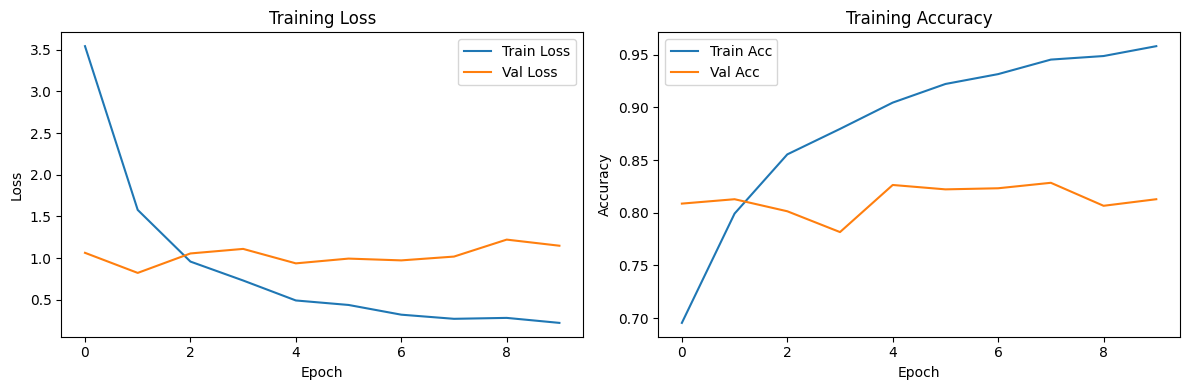


Testing on sample images...

Processing test image 1...
Detected 3 objects


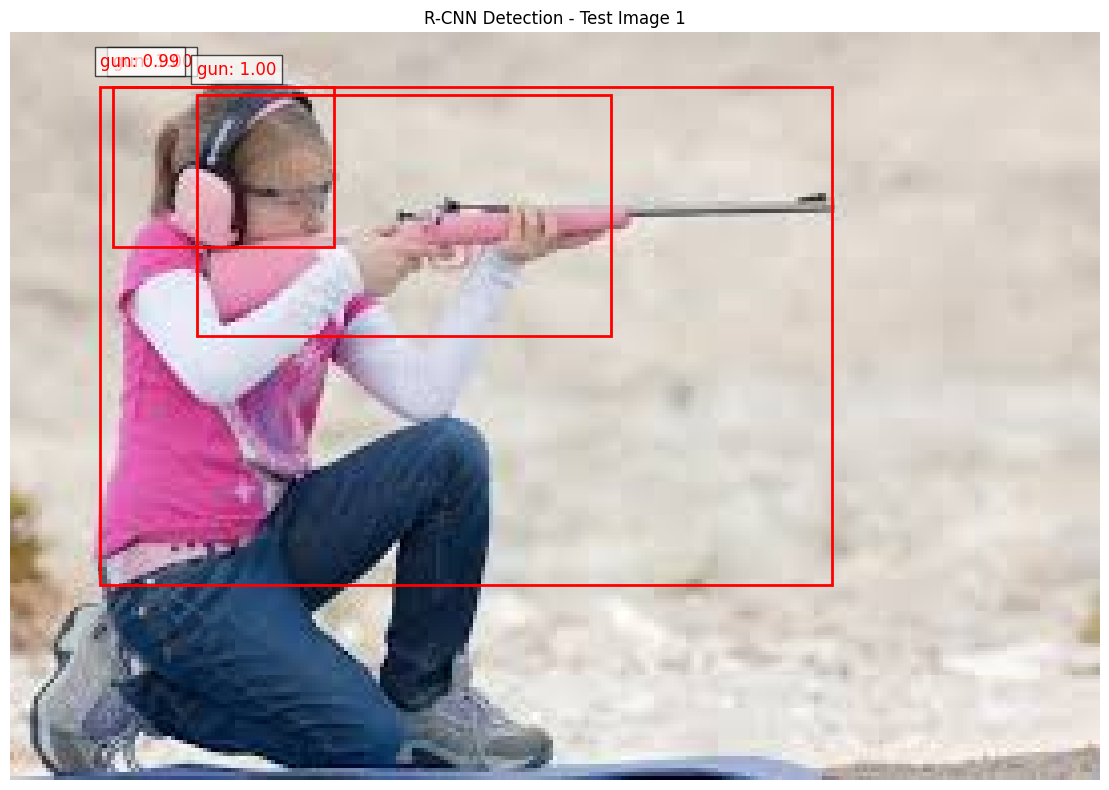


Processing test image 2...
Detected 7 objects


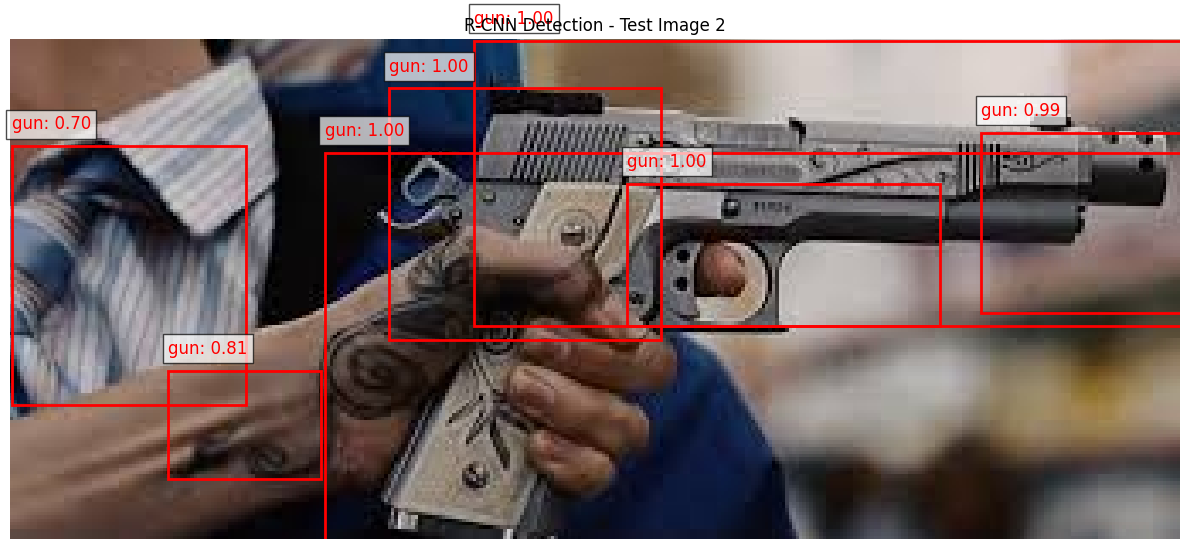


Processing test image 3...
Detected 12 objects


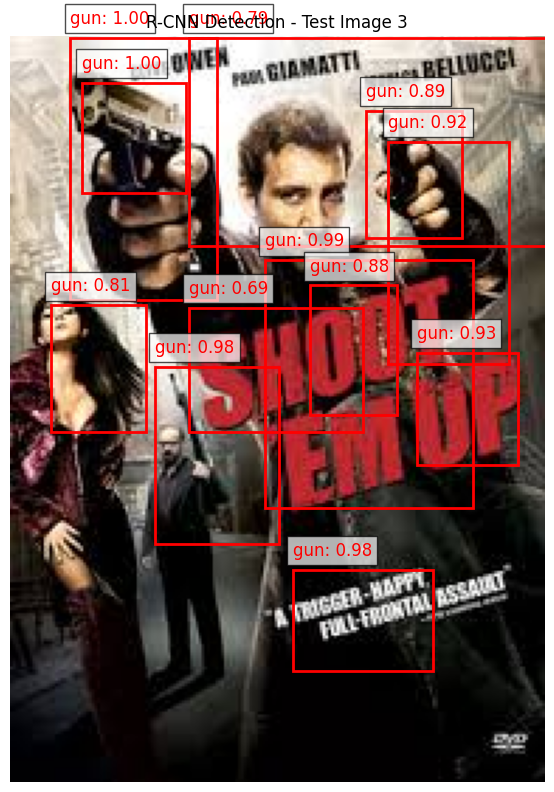


R-CNN training and inference complete!


In [12]:
import cv2
import numpy as np
import os
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def parse_yolo_annotation(txt_path, img_width, img_height):
    """Parse annotation file to extract bounding boxes and labels.
    Format: First line is count, then each line is: xmin ymin xmax ymax (absolute coordinates)
    """
    boxes = []
    labels = []

    try:
        with open(txt_path, 'r') as f:
            lines = f.readlines()

        if len(lines) < 2:
            return boxes, labels

        # First line is the count (skip it)
        count = int(lines[0].strip())

        # Parse each bounding box
        for i in range(1, len(lines)):
            line = lines[i].strip()
            if not line:
                continue

            parts = line.split()
            if len(parts) < 4:
                continue

            try:
                xmin = int(parts[0])
                ymin = int(parts[1])
                xmax = int(parts[2])
                ymax = int(parts[3])

                # Ensure valid box and within image bounds
                xmin = max(0, min(xmin, img_width))
                ymin = max(0, min(ymin, img_height))
                xmax = max(0, min(xmax, img_width))
                ymax = max(0, min(ymax, img_height))

                # Ensure valid box
                if xmax > xmin and ymax > ymin:
                    boxes.append([xmin, ymin, xmax, ymax])
                    labels.append('gun')
            except (ValueError, IndexError) as e:
                continue
    except Exception as e:
        print(f"Error reading {txt_path}: {e}")

    return boxes, labels

def load_dataset(base_path):
    """Load all images and annotations from the dataset."""
    images_path = os.path.join(base_path, 'Images')
    labels_path = os.path.join(base_path, 'Labels')

    data = []

    if not os.path.exists(images_path):
        print(f"Error: Images path not found: {images_path}")
        return data

    if not os.path.exists(labels_path):
        print(f"Error: Labels path not found: {labels_path}")
        return data

    # Get all label files
    label_files = set(os.listdir(labels_path))

    loaded = 0
    skipped = 0
    no_label = 0
    empty_boxes = 0

    # Debug: check first few files
    debug_count = 0

    for img_file in os.listdir(images_path):
        if not img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        img_path = os.path.join(images_path, img_file)

        # Try to find matching label file
        base_name = os.path.splitext(img_file)[0]
        txt_file = base_name + '.txt'
        txt_path = os.path.join(labels_path, txt_file)

        # Debug first 3 files
        if debug_count < 3:
            print(f"\nDebug file #{debug_count + 1}:")
            print(f"  Image: {img_file}")
            print(f"  Looking for label: {txt_file}")
            print(f"  Label exists: {os.path.exists(txt_path)}")
            if os.path.exists(txt_path):
                with open(txt_path, 'r') as f:
                    content = f.read()
                    print(f"  Label content: {repr(content[:100])}")
            debug_count += 1

        if not os.path.exists(txt_path):
            no_label += 1
            skipped += 1
            continue

        # Read image to get dimensions
        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: Could not read image: {img_path}")
            skipped += 1
            continue
        img_height, img_width = img.shape[:2]

        boxes, labels = parse_yolo_annotation(txt_path, img_width, img_height)

        if len(boxes) > 0:  # Only add if there are annotations
            data.append({
                'image_path': img_path,
                'boxes': boxes,
                'labels': labels
            })
            loaded += 1
        else:
            empty_boxes += 1
            skipped += 1

    print(f"\nSuccessfully loaded: {loaded} images")
    print(f"Skipped - no matching label: {no_label}")
    print(f"Skipped - empty/invalid boxes: {empty_boxes}")
    print(f"Total skipped: {skipped}")

    return data


def generate_region_proposals(img, method='selective_search', n_proposals=2000):
    """Generate region proposals using Selective Search."""
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(img)
    ss.switchToSelectiveSearchFast()
    rects = ss.process()

    # Convert to [xmin, ymin, xmax, ymax] format
    proposals = []
    for (x, y, w, h) in rects[:n_proposals]:
        proposals.append([x, y, x+w, y+h])

    return np.array(proposals)

def compute_iou(box1, box2):
    """Compute Intersection over Union between two boxes."""
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    intersection = max(0, x2 - x1) * max(0, y2 - y1)
    area1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union = area1 + area2 - intersection

    return intersection / union if union > 0 else 0

def label_proposals(proposals, gt_boxes, gt_labels, iou_threshold=0.5):
    """Label proposals as positive (object) or negative (background)."""
    labeled_proposals = []

    for proposal in proposals:
        max_iou = 0
        best_label = 'background'

        for gt_box, gt_label in zip(gt_boxes, gt_labels):
            iou = compute_iou(proposal, gt_box)
            if iou > max_iou:
                max_iou = iou
                if iou >= iou_threshold:
                    best_label = gt_label

        labeled_proposals.append({
            'box': proposal,
            'label': best_label,
            'iou': max_iou
        })

    return labeled_proposals


def extract_features(img, proposals, feature_extractor, min_size=30):
    """Extract CNN features from proposed regions."""
    features = []
    valid_proposals = []

    for proposal in proposals:
        x1, y1, x2, y2 = proposal['box']
        w, h = x2 - x1, y2 - y1

        if w < min_size or h < min_size:
            continue

        # Extract ROI
        roi = img[y1:y2, x1:x2]
        if roi.size == 0:
            continue

        # Resize to 224x224 for VGG16
        roi_resized = cv2.resize(roi, (224, 224))

        # Preprocess
        x_input = np.expand_dims(image.img_to_array(roi_resized), axis=0)
        x_input = preprocess_input(x_input)

        # Extract features
        feat = feature_extractor.predict(x_input, verbose=0)
        features.append(feat.flatten())
        valid_proposals.append(proposal)

    return np.array(features), valid_proposals


def build_classifier(input_dim, n_classes):
    """Build a simple classifier on top of CNN features."""
    model = Sequential([
        Dense(512, activation='relu', input_dim=input_dim),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(n_classes, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

def prepare_training_data(dataset, feature_extractor, max_samples_per_image=50):
    """Prepare training data from the dataset."""
    X_train = []
    y_train = []

    print("Preparing training data...")
    for idx, data_item in enumerate(dataset):
        print(f"Processing image {idx+1}/{len(dataset)}")

        img = cv2.imread(data_item['image_path'])
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Generate proposals
        proposals = generate_region_proposals(img_rgb, n_proposals=500)

        # Label proposals
        labeled_proposals = label_proposals(
            proposals,
            data_item['boxes'],
            data_item['labels']
        )

        # Balance positive and negative samples
        positive_samples = [p for p in labeled_proposals if p['label'] != 'background']
        negative_samples = [p for p in labeled_proposals if p['label'] == 'background']

        # Sample equal number of positives and negatives
        n_positives = min(len(positive_samples), max_samples_per_image // 2)
        n_negatives = min(len(negative_samples), max_samples_per_image // 2)

        if n_positives > 0:
            sampled_positives = np.random.choice(len(positive_samples), n_positives, replace=False)
            sampled_negatives = np.random.choice(len(negative_samples), n_negatives, replace=False)

            sampled_proposals = [positive_samples[i] for i in sampled_positives] + \
                              [negative_samples[i] for i in sampled_negatives]

            # Extract features
            features, _ = extract_features(img_rgb, sampled_proposals, feature_extractor)
            labels = [p['label'] for p in sampled_proposals[:len(features)]]

            X_train.extend(features)
            y_train.extend(labels)

    return np.array(X_train), np.array(y_train)

def detect_objects(img_path, feature_extractor, classifier, label_encoder,
                  conf_threshold=0.8, nms_threshold=0.3):
    """Detect objects in a new image."""
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Generate proposals
    proposals = generate_region_proposals(img_rgb, n_proposals=1000)
    labeled_proposals = [{'box': p, 'label': 'unknown'} for p in proposals]

    # Extract features
    features, valid_proposals = extract_features(img_rgb, labeled_proposals, feature_extractor)

    if len(features) == 0:
        return img_rgb, [], []

    # Predict classes
    predictions = classifier.predict(features, verbose=0)
    predicted_classes = np.argmax(predictions, axis=1)
    confidence_scores = np.max(predictions, axis=1)

    # Filter by confidence and class
    detections = []
    for i, (proposal, pred_class, conf) in enumerate(zip(valid_proposals, predicted_classes, confidence_scores)):
        class_name = label_encoder.inverse_transform([pred_class])[0]

        if class_name != 'background' and conf >= conf_threshold:
            detections.append({
                'box': proposal['box'],
                'class': class_name,
                'confidence': conf
            })

    # Apply Non-Maximum Suppression
    detections = apply_nms(detections, nms_threshold)

    return img_rgb, detections, []

def apply_nms(detections, iou_threshold=0.3):
    """Apply Non-Maximum Suppression to remove overlapping boxes."""
    if len(detections) == 0:
        return []

    # Sort by confidence
    detections = sorted(detections, key=lambda x: x['confidence'], reverse=True)

    keep = []
    while len(detections) > 0:
        best = detections[0]
        keep.append(best)
        detections = detections[1:]

        # Remove overlapping boxes
        detections = [d for d in detections
                     if compute_iou(best['box'], d['box']) < iou_threshold]

    return keep

def visualize_detections(img, detections, title="R-CNN Object Detection"):
    """Visualize detection results."""
    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(img)

    for det in detections:
        x1, y1, x2, y2 = det['box']
        w, h = x2 - x1, y2 - y1

        rect = patches.Rectangle((x1, y1), w, h,
                                linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

        label = f"{det['class']}: {det['confidence']:.2f}"
        ax.text(x1, y1-5, label, color='red', fontsize=12,
               bbox=dict(facecolor='white', alpha=0.7))

    ax.set_title(title)
    ax.axis('off')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Configuration
    DATASET_PATH = 'guns_dataset'

    # Load VGG16 as feature extractor
    print("Loading VGG16 feature extractor...")
    feature_extractor = VGG16(weights='imagenet', include_top=False,
                             input_shape=(224, 224, 3))

    # Load dataset
    print("\nLoading dataset...")
    dataset = load_dataset(DATASET_PATH)
    print(f"Loaded {len(dataset)} images")

    if len(dataset) == 0:
        print("\nERROR: No images loaded! Checking directory structure...")
        print(f"Looking for images in: {os.path.join(DATASET_PATH, 'Images')}")
        print(f"Looking for labels in: {os.path.join(DATASET_PATH, 'Labels')}")

        # Check what's actually in the guns_dataset folder
        if os.path.exists(DATASET_PATH):
            print(f"\nContents of {DATASET_PATH}:")
            for item in os.listdir(DATASET_PATH):
                item_path = os.path.join(DATASET_PATH, item)
                if os.path.isdir(item_path):
                    print(f"  [DIR] {item}/")
                    # Show first few files in each subdirectory
                    files = os.listdir(item_path)[:5]
                    for f in files:
                        print(f"    - {f}")
                    if len(os.listdir(item_path)) > 5:
                        print(f"    ... and {len(os.listdir(item_path)) - 5} more files")
                else:
                    print(f"  [FILE] {item}")
        else:
            print(f"ERROR: {DATASET_PATH} directory does not exist!")

        raise ValueError("No images loaded from dataset. Check paths above.")

    # Split dataset
    train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

    # Prepare training data
    X_train, y_train = prepare_training_data(train_data, feature_extractor,
                                            max_samples_per_image=40)

    # Encode labels
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)

    print(f"\nTraining samples: {len(X_train)}")
    print(f"Classes: {label_encoder.classes_}")
    print(f"Class distribution: {np.bincount(y_train_encoded)}")

    # Build and train classifier
    print("\nBuilding classifier...")
    classifier = build_classifier(X_train.shape[1], len(label_encoder.classes_))

    print("\nTraining classifier...")
    history = classifier.fit(
        X_train, y_train_encoded,
        epochs=10,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )

    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training Accuracy')
    plt.tight_layout()
    plt.show()

    # Test on a few images
    print("\nTesting on sample images...")
    for i in range(min(3, len(test_data))):
        test_img = test_data[i]
        print(f"\nProcessing test image {i+1}...")

        img_rgb, detections, _ = detect_objects(
            test_img['image_path'],
            feature_extractor,
            classifier,
            label_encoder,
            conf_threshold=0.6
        )

        print(f"Detected {len(detections)} objects")
        visualize_detections(img_rgb, detections,
                           title=f"R-CNN Detection - Test Image {i+1}")

    print("\nR-CNN training and inference complete!")